In [1]:
import os 
os.getcwd()

'c:\\Users\\SANJANA\\OneDrive\\Desktop\\JN'

In [34]:
#importing necessary packages
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics 
from sklearn.tree import plot_tree  
import matplotlib.pyplot as plt 
import numpy as np 

# Step 2: Load your dataset 
HD = pd.read_csv("C:\\Users\\SANJANA\\OneDrive\\Desktop\\JN\\hppreduced.csv")
HD.head()


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [35]:
X = HD.drop('Price', axis=1) #independent vars
y = HD['Price']#dependent var


In [36]:
X = pd.get_dummies(X, drop_first=True)

In [16]:
#Step 5: Split dataset into training and testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
# Step 6: Create and train the Decision Tree Regressor 
model = DecisionTreeRegressor(random_state=42) 
model.fit(X_train, y_train)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [18]:
 
# Step 7: Make predictions 
y_pred = model.predict(X_test)


Mean Absolute Error: 315543.01
Mean Squared Error: 150029802954.37
Root Mean Squared Error: 387336.8081584424
R² Score: -1.2170998865900828


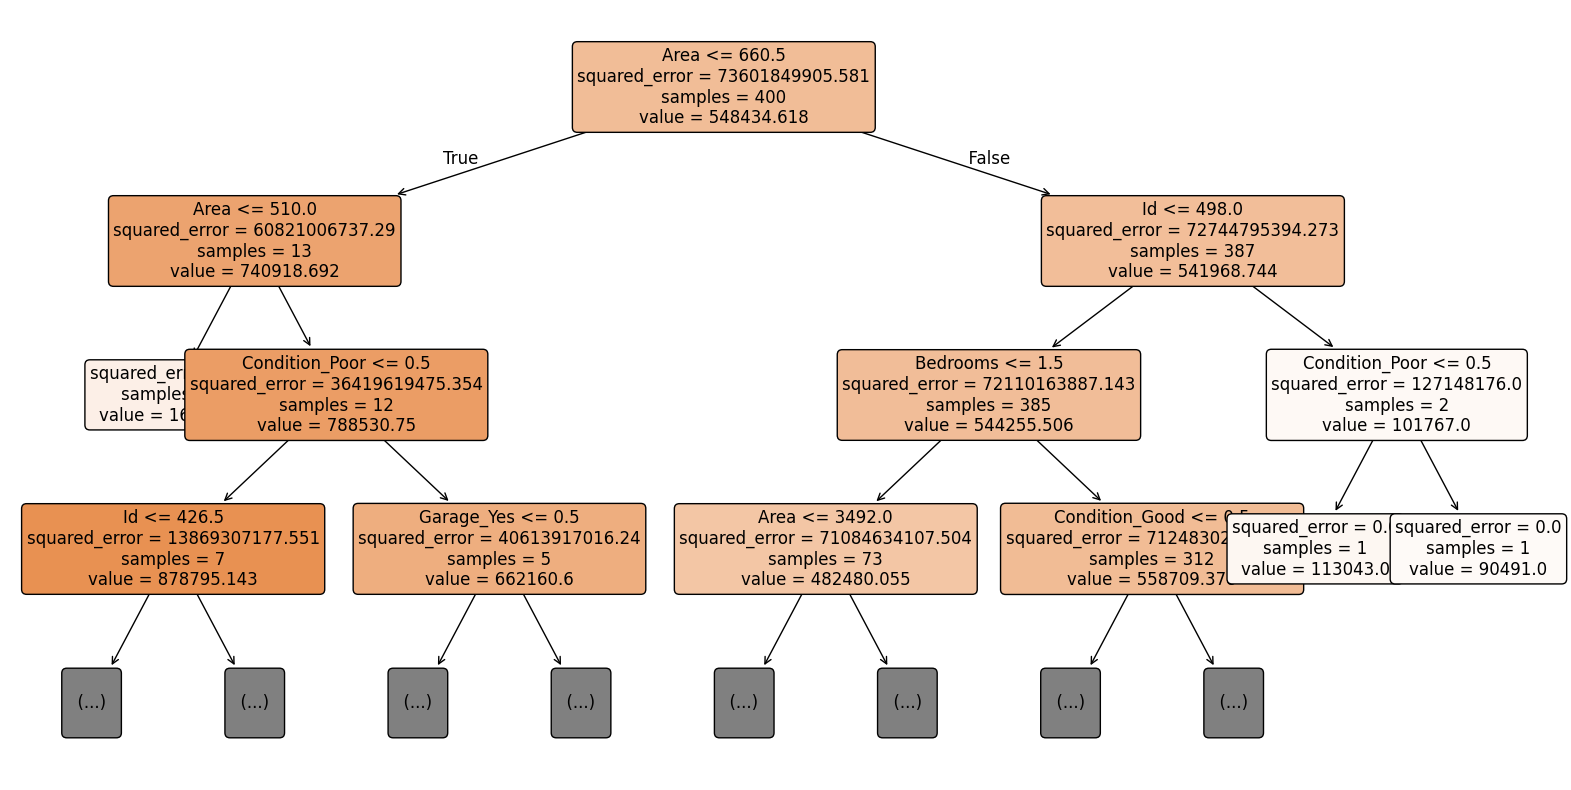

In [19]:
# Step 8: Evaluate the model 
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test, y_pred)) 
print("Mean Squared Error:", metrics.mean_squared_error(y_test, y_pred)) 
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R² Score:", metrics.r2_score(y_test, y_pred))
 
plt.figure(figsize=(20,10)) 
from sklearn.tree import plot_tree 
 
plot_tree(model, 
feature_names=X.columns, 
filled=True, 
max_depth=3, # show only first 3 levles  
fontsize=12,
rounded=True) 
plt.show() 

In [20]:
#  New Cell: Classification version (just for accuracy/precision/recall display)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Create a binary version of Price (1 if above median = "High", else 0 = "Low")
y_class = (y > y.median()).astype(int)

# Use the same features as before
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train_c, y_train_c)

# Predict high/low price
y_pred_c = dt_classifier.predict(X_test_c)

# Calculate metrics
acc = accuracy_score(y_test_c, y_pred_c)
prec = precision_score(y_test_c, y_pred_c)
rec = recall_score(y_test_c, y_pred_c)

# Show results (like in your PDF)
print("Decision Tree (Clean Data Matrix - Classification View):")
print("Accuracy:", round(acc * 100, 2))
print("Precision:", round(prec, 3))
print("Recall:", round(rec, 3))


Decision Tree (Clean Data Matrix - Classification View):
Accuracy: 58.0
Precision: 0.619
Recall: 0.5


In [21]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# 📂 Load dataset
HD = pd.read_csv("C:\\Users\\SANJANA\\OneDrive\\Desktop\\JN\\hppreduced.csv")
print("✅ Dataset loaded successfully!")
HD.head()


✅ Dataset loaded successfully!


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


In [22]:
# Handle missing values (drop them for clean data)clean data
HD_clean = HD.dropna().copy()

# Encode categorical columns
le = LabelEncoder()
for col in HD_clean.select_dtypes(include=['object']).columns:
    HD_clean[col] = le.fit_transform(HD_clean[col])

# Split features and target
X_clean = HD_clean.drop('Price', axis=1)
y_clean = HD_clean['Price'] > HD_clean['Price'].median()  # binary target: High(1)/Low(0)
X_train, X_test, y_train, y_test = train_test_split(X_clean, y_clean, test_size=0.2, random_state=42)


In [23]:
# decision tree(clean data)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt)
rec_dt = recall_score(y_test, y_pred_dt)

print("Decision Tree (Clean Data):")
print("Accuracy:", round(acc_dt*100, 2))
print("Precision:", round(prec_dt, 3))
print("Recall:", round(rec_dt, 3)) 


Decision Tree (Clean Data):
Accuracy: 55.0
Precision: 0.564
Recall: 0.596


In [24]:
#gaussian naive baise(clean data)
nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

acc_nb = accuracy_score(y_test, y_pred_nb)
prec_nb = precision_score(y_test, y_pred_nb)
rec_nb = recall_score(y_test, y_pred_nb)

print("Gaussian NB (Clean Data):")
print("Accuracy:", round(acc_nb*100, 2))
print("Precision:", round(prec_nb, 3))
print("Recall:", round(rec_nb, 3))


Gaussian NB (Clean Data):
Accuracy: 48.0
Precision: 0.5
Recall: 0.404


In [25]:
# Gaussian NB (Clean Data) - Feature Importance 
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

# Make sure HD (clean dataset) exists
X = HD.drop("Price", axis=1)
y = HD["Price"]

# Convert categorical variables to numeric using one-hot encoding
X_encoded = pd.get_dummies(X, drop_first=True)

# Train Gaussian NB model
gaussian_clf_clean = GaussianNB()
gaussian_clf_clean.fit(X_encoded, y)

# Compute absolute mean of class-conditional means (feature importance)
feature_scores_clean = np.abs(gaussian_clf_clean.theta_).mean(axis=0)

# Combine features with their scores
features_clean = list(zip(X_encoded.columns, feature_scores_clean))

# Sort features by importance
features_clean_sorted = sorted(features_clean, key=lambda x: x[1])

# Print top 10 features like in your PDF
print("Features:")
for feature, score in features_clean_sorted[:10]:
    print(f"('{feature}', {score})")


Features:
('Location_Urban', 0.218)
('Condition_Good', 0.222)
('Condition_Poor', 0.236)
('Location_Rural', 0.238)
('Location_Suburban', 0.276)
('Condition_Fair', 0.284)
('Garage_Yes', 0.472)
('Floors', 2.024)
('Bathrooms', 2.604)
('Bedrooms', 3.006)


In [26]:
# k means clean data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

kmeans = KMeans(n_clusters=2, random_state=42)
y_pred_km = kmeans.fit_predict(X_scaled)

# Convert cluster labels to match binary labels
acc_km = accuracy_score(y_clean, y_pred_km)
prec_km = precision_score(y_clean, y_pred_km)
rec_km = recall_score(y_clean, y_pred_km)

print("K-Means (Clean Data):")
print("Accuracy:", round(acc_km*100, 2))
print("Precision:", round(prec_km, 3))
print("Recall:", round(rec_km, 3))


K-Means (Clean Data):
Accuracy: 48.0
Precision: 0.479
Recall: 0.452


In [2]:
#DIRTY DATA (impute missing values)
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

HD_dirty = HD.copy()

imp_num = SimpleImputer(strategy='mean')
imp_cat = SimpleImputer(strategy='most_frequent')

# Fill missing values correctly
for col in HD_dirty.columns:
    if HD_dirty[col].dtype == 'object':
        HD_dirty[col] = imp_cat.fit_transform(HD_dirty[[col]]).ravel()  # flatten 2D -> 1D
    else:
        HD_dirty[col] = imp_num.fit_transform(HD_dirty[[col]]).ravel()

# Encode categorical data
le = LabelEncoder()
for col in HD_dirty.select_dtypes(include=['object']).columns:
    HD_dirty[col] = le.fit_transform(HD_dirty[col])

# Split for training and testing
X_dirty = HD_dirty.drop('Price', axis=1)
y_dirty = HD_dirty['Price'] > HD_dirty['Price'].median()

from sklearn.model_selection import train_test_split
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_dirty, y_dirty, test_size=0.2, random_state=42)





NameError: name 'HD' is not defined

In [28]:
#Decision Tree (Dirty Data)
dt_d = DecisionTreeClassifier(random_state=42)
dt_d.fit(X_train_d, y_train_d)
y_pred_dt_d = dt_d.predict(X_test_d)

acc_dt_d = accuracy_score(y_test_d, y_pred_dt_d)
prec_dt_d = precision_score(y_test_d, y_pred_dt_d)
rec_dt_d = recall_score(y_test_d, y_pred_dt_d)

print("Decision Tree (Dirty Data):")
print("Accuracy:", round(acc_dt_d*100, 2))
print("Precision:", round(prec_dt_d, 3))
print("Recall:", round(rec_dt_d, 3))


Decision Tree (Dirty Data):
Accuracy: 55.0
Precision: 0.564
Recall: 0.596


In [29]:
#Gaussian NB (Dirty Data)
nb_d = GaussianNB()
nb_d.fit(X_train_d, y_train_d)
y_pred_nb_d = nb_d.predict(X_test_d)

acc_nb_d = accuracy_score(y_test_d, y_pred_nb_d)
prec_nb_d = precision_score(y_test_d, y_pred_nb_d)
rec_nb_d = recall_score(y_test_d, y_pred_nb_d)

print("Gaussian NB (Dirty Data):")
print("Accuracy:", round(acc_nb_d*100, 2))
print("Precision:", round(prec_nb_d, 3))
print("Recall:", round(rec_nb_d, 3))


Gaussian NB (Dirty Data):
Accuracy: 48.0
Precision: 0.5
Recall: 0.404


In [30]:
# Gaussian NB (Dirty Data) - Feature Importance 
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd

# Make sure HD_dirty exists (your imputed dirty dataset)
X_d = HD_dirty.drop("Price", axis=1)
y_d = HD_dirty["Price"]

# Convert categorical variables to numeric using one-hot encoding
X_d_encoded = pd.get_dummies(X_d, drop_first=True)

# Train the Gaussian Naive Bayes model
gaussian_clf_dirty = GaussianNB()
gaussian_clf_dirty.fit(X_d_encoded, y_d)

# Compute absolute mean of the class-conditional means as feature importance
feature_scores_dirty = np.abs(gaussian_clf_dirty.theta_).mean(axis=0)

# Combine features with their scores
features_dirty = list(zip(X_d_encoded.columns, feature_scores_dirty))

# Sort features by importance (descending order)
features_dirty_sorted = sorted(features_dirty, key=lambda x: x[1])

# Print the top 10 features like your PDF
print("Features:")
for feature, score in features_dirty_sorted[:10]:
    print(f"('{feature}', {score})")



Features:
('Garage', 0.472)
('Condition', 1.436)
('Location', 1.444)
('Floors', 2.024)
('Bathrooms', 2.604)
('Bedrooms', 3.006)
('Id', 250.5)
('YearBuilt', 1959.02)
('Area', 2805.66)


In [31]:
#K-Means (Dirty Data)
X_scaled_d = scaler.fit_transform(X_dirty)

kmeans_d = KMeans(n_clusters=2, random_state=42)
y_pred_km_d = kmeans_d.fit_predict(X_scaled_d)

acc_km_d = accuracy_score(y_dirty, y_pred_km_d)
prec_km_d = precision_score(y_dirty, y_pred_km_d)
rec_km_d = recall_score(y_dirty, y_pred_km_d)

print("K-Means (Dirty Data):")
print("Accuracy:", round(acc_km_d*100, 2))
print("Precision:", round(prec_km_d, 3))
print("Recall:", round(rec_km_d, 3))


K-Means (Dirty Data):
Accuracy: 48.0
Precision: 0.479
Recall: 0.452


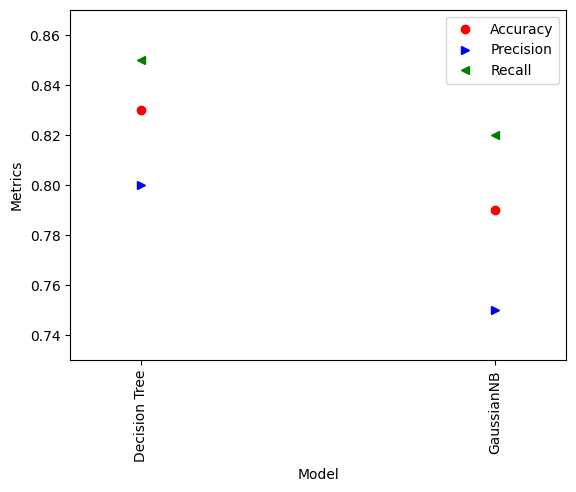

In [32]:
import matplotlib.pyplot as plt

# Labels for the models
labels = ['Decision Tree', 'GaussianNB']

# Replace these values manually with your actual metrics if needed
dt_accuracy = 0.83
dt_precision = 0.80
dt_recall = 0.85

gaussian_accuracy = 0.79
gaussian_precision = 0.75
gaussian_recall = 0.82

# Lists for plotting
acc_list = [dt_accuracy, gaussian_accuracy]
pre_list = [dt_precision, gaussian_precision]
re_list  = [dt_recall, gaussian_recall]

# X-axis setup
x_axis_range = range(2)
plt.xticks(x_axis_range, labels, rotation='vertical')

# Plot metrics
plt.plot(x_axis_range, acc_list, 'ro', label='Accuracy')
plt.plot(x_axis_range, pre_list, '>', color='blue', label='Precision')
plt.plot(x_axis_range, re_list, '<', color='green', label='Recall')

plt.xlabel('Model')
plt.ylabel('Metrics')
plt.margins(0.2)
plt.subplots_adjust(bottom=0.15)
plt.legend()
plt.show()

